# Advanced Notebook: requesting the TerraCatalog and calculate NDVI ourselves

In Terrascope, you can use Terracatalogueclient to retrieve the various products that are stored i the Terrascope either by downloading them or fetch it from within the Terracope Catalogue. Below we start with importing the necessary packages including the Terracatalogueclient, as well as the other more standard packages.

If you ran other notebooks before this one, make sure to shut down all kernels before reconnecting to the 3.6 kernel and running this script, otherwise you might run out of memory.

This notebook shows the usage of the Python client for the Terrascope catalogue. API documentation is available (here)[https://vitobelgium.github.io/terracatalogueclient/].

In [2]:
import datetime as dt                                     # date and time functions  
import getpass
from terracatalogueclient import Catalogue
from terracatalogueclient.config import CatalogueConfig
import rasterio
import seaborn as sns
import numpy as np
import matplotlib.pyplot as mplot                        
from mpl_toolkits.axes_grid1 import make_axes_locatable

The first step would be to initialize the catalogueclient

In [3]:
# create an instance

catalogue = Catalogue() 

## Product types

Terrascope Sentinel Product types


First, we have a look at the different Sentinel collections available in the catalog. Then we list the number of products avilable over specified time period.

In [4]:
def available_collection(platform):
    # Get a list of collections
    collections = list(catalogue.get_collections(platform=platform))    
    print(f"Found {len(collections)} collections available for the {platform}")
    #iterate over the list of collection
    for collection in collections:
        # count number of products in each collection
        count = catalogue.get_product_count(
            collection.id,
            start = dt.date(2019, 1, 1),
            end = dt.date(2020, 1, 1))
        print(f"There are {count} products for {collection} collection")
    return

In [5]:
# let's check all the available collections for Sentinel-1
available_collection("Sentinel-1")

Found 14 collections available for the Sentinel-1
There are 9303 products for urn:eop:VITO:CGS_S1_GRD_L1 collection
There are 8251 products for urn:eop:VITO:CGS_S1_GRD_SIGMA0_L1 collection
There are 1657 products for urn:eop:VITO:CGS_S1_SLC_L1 collection
There are 0 products for urn:eop:VITO:ESA_WORLDCEREAL_MAIZE_V1 collection
There are 0 products for urn:eop:VITO:ESA_WORLDCEREAL_SPRINGCEREALS_V1 collection
There are 0 products for urn:eop:VITO:ESA_WORLDCEREAL_TEMPORARYCROPS_V1 collection
There are 0 products for urn:eop:VITO:ESA_WORLDCEREAL_WINTERCEREALS_V1 collection
There are 2651 products for urn:eop:VITO:ESA_WorldCover_10m_2020_AWS_V1 collection
There are 2651 products for urn:eop:VITO:ESA_WorldCover_10m_2020_V1 collection
There are 0 products for urn:eop:VITO:ESA_WorldCover_10m_2021_AWS_V2 collection
There are 0 products for urn:eop:VITO:ESA_WorldCover_10m_2021_V2 collection
There are 17367 products for urn:eop:VITO:ESA_WorldCover_S1VVVHratio_10m_2020_V1 collection
There are 0 pr

In [24]:
# let's check all the available collections for Sentinel-2
available_collection("Sentinel-2")

Found 28 collections available for the Sentinel-2
There are 17780 products for urn:eop:VITO:CGS_S2_L1C collection
There are 0 products for urn:eop:VITO:ESA_WORLDCEREAL_ACTIVECROPLAND_V1 collection
There are 0 products for urn:eop:VITO:ESA_WORLDCEREAL_IRRIGATION_V1 collection
There are 0 products for urn:eop:VITO:ESA_WORLDCEREAL_MAIZE_V1 collection
There are 0 products for urn:eop:VITO:ESA_WORLDCEREAL_SPRINGCEREALS_V1 collection
There are 0 products for urn:eop:VITO:ESA_WORLDCEREAL_TEMPORARYCROPS_V1 collection
There are 0 products for urn:eop:VITO:ESA_WORLDCEREAL_WINTERCEREALS_V1 collection
There are 2651 products for urn:eop:VITO:ESA_WorldCover_10m_2020_AWS_V1 collection
There are 2651 products for urn:eop:VITO:ESA_WorldCover_10m_2020_V1 collection
There are 0 products for urn:eop:VITO:ESA_WorldCover_10m_2021_AWS_V2 collection
There are 0 products for urn:eop:VITO:ESA_WorldCover_10m_2021_V2 collection
There are 18970 products for urn:eop:VITO:ESA_WorldCover_NDVI_10m_2020_V1 collection


## Products in a selected area, within a predefined time window

To narrow down, below we provide a list of Sentinel-2 products for a pre-defined time window over a selected area. In this case, we want to select the fAPAR data for 1 - 10 July 2018 for the region 51 - 52
N, 4 - 5
E. The TerraCatalogue exposes all necessary information, including bands containing related data (e.g. cloud mask) and a cloud cover percentage.

In [6]:
collection   = 'urn:eop:VITO:TERRASCOPE_S2_FAPAR_V2' # choose any product type in the lists we made earlier
startDate    = dt.date(2018,7,1)
endDate      = dt.date(2018,7,10)
minLatitude  = 51 #in decimal degrees, positive for North
maxLatitude  = 52
minLongitude = 4 #in decimal degrees, positive for East
maxLongitude = 5

products = list(catalogue.get_products(collection,startDate, endDate,
                                  bbox='{},{},{},{}'.format(minLongitude, minLatitude, maxLongitude, maxLatitude),
                                  cloudCover="[10,20[",
                                  accessedFrom="MEP"))
print(f"Found {len(products)} products")
for product in products:
    print("{}: {} % clouds".format(product.title, product.properties["productInformation"]["cloudCover"]))
    
local_paths = [pf.href for p in products for pf in p.data]

Found 6 products
S2A_20180707T104021_31UES_FAPAR_10M_V200: 11.843 % clouds
S2A_20180707T104021_31UES_FAPAR_20M_V200: 11.843 % clouds
S2A_20180707T104021_31UFS_FAPAR_10M_V210: 17.848 % clouds
S2A_20180707T104021_31UFS_FAPAR_20M_V210: 17.848 % clouds
S2A_20180707T104021_31UFT_FAPAR_10M_V200: 12.018 % clouds
S2A_20180707T104021_31UFT_FAPAR_20M_V200: 12.018 % clouds


Let's fetch a sepecific f_fapar product from the above list for visual analysis.

Once the data are read, we can convert them to physical values and plot the results. Also here, we do not yet read the conversion factors from the metadata, but use the hard coded value. Physical values > 1 are finally set to NaN (non-clear pixels).

In [70]:
f_fapar=products[3].data[0].href #look at the third image
with rasterio.open(f_fapar, 'r') as data:
    d_fapar=data.read(1).astype('uint8') #the FAPAR values are stored as byte data

0.0 0.975


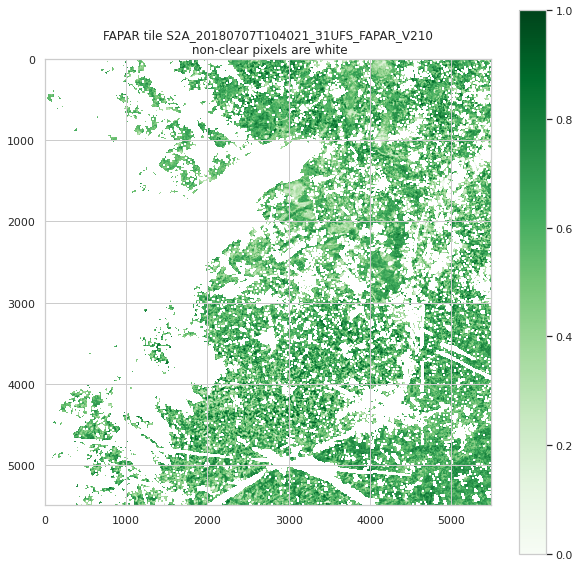

In [71]:
#set the seaborn plotting environment
sns.set()
sns.set_style("whitegrid")

#Take a subset, change these values if necessary
sub = np.array([0, 10000])

#Set NoData --> NaN, convert DN --> PV: for now use hard coded value
fapar_sub = d_fapar[sub[0]:sub[1],sub[0]:sub[1]]

fapar_sub[fapar_sub == 255] = -1
fapar_sub = fapar_sub * 0.005
fapar_sub[fapar_sub > 1.] = np.nan
print(np.nanmin(fapar_sub), np.nanmax(fapar_sub))

#create map plots for the RED and NIR and resulting NDVI, use subplots
mplot.figure(figsize=(10,10))
#mplot.subplot(111) # we only want to plot one subplot

#show the FAPAR values
mplot.imshow(fapar_sub, cmap='Greens', vmin=0., vmax=1.0)
mplot.colorbar()

#there are many colormaps that you can use. See here: https://matplotlib.org/examples/color/colormaps_reference.html
mplot.title('FAPAR tile ' + f_fapar.split('/')[10] + '\n non-clear pixels are white')

# free up some resources
d_fapar   = None
sub       = None
fapar_sub = None

Now, let's do some processing. 

1. we will look for the raw 10 m Sentinel-2 bands 
2. then we load the RED (B04) and NIR (B08) bands to calculate the NDVI
3. and we show the results

In [76]:
collection = 'urn:eop:VITO:TERRASCOPE_S2_TOC_V2' 
startDate = dt.date(2018,5,6)
endDate = dt.date(2018,5,7)
minLatitude = 51 
maxLatitude = 52
minLongitude = 4 
maxLongitude = 5
tileId = '31UES'

products = list(catalogue.get_products(collection,startDate, endDate,
                                  bbox='{},{},{},{}'.format(minLongitude, minLatitude, maxLongitude, maxLatitude),
                                    tileId='31UES',accessedFrom="MEP"))

for product in products:
    url_product = product.data[0].href
    print(f"The available products is {product.title} \n available in: {url_product}")

The available products is S2B_20180506T105029_31UES_TOC_V200 
 available in: file:///data/MTDA/TERRASCOPE_Sentinel2/TOC_V2/2018/05/06/S2B_20180506T105029_31UES_TOC_V200/S2B_20180506T105029_31UES_TOC-B01_60M_V200.tif


Data are stored in folders, with some more interesting data:

* bands containing the data
* related bands (cloud shadow masks, AOT data, scene classification)
* XML INSPIRE metdata

This information is all exposed by the TerraCatalogue.

Let's do some processing on the data. We'll derive the NDVI from the Red and NIR bands.

In [83]:
product = products[0]
print(product.properties['title'])

for band in product.properties['links']['data']:
    if band['title'] =='TOC-B04_10M': #red
        print('Red Found')
        f_red = band['href']   
    if band['title'] =='TOC-B08_10M': #near-infrared
        print('NIR Found')
        f_nir = band['href']   

#read the files with rasterio 
with rasterio.open(f_red, 'r') as data:
    d_red = data.read(1).astype(float)
    print('Red Loaded')
      
with rasterio.open(f_nir, 'r') as data:
    d_nir = data.read(1).astype(float)
    print('NIR Loaded')

S2B_20180506T105029_31UES_TOC_V200
Red Found
NIR Found
Red Loaded
NIR Loaded


In [84]:
#select the values that should be discarded from both the RED and NIR TOC reflectances
noval = np.where((d_red == 32767) | (d_red < 0) | (d_nir == 32767) | (d_nir < 0))    
d_red[noval] = np.nan
d_nir[noval] = np.nan

#apply the scaling factor
d_red = d_red * 0.0001 
d_nir = d_nir * 0.0001

#compute the NDVI from RED and NIR
d_ndvi = (d_red - d_nir) / (d_red + d_nir)

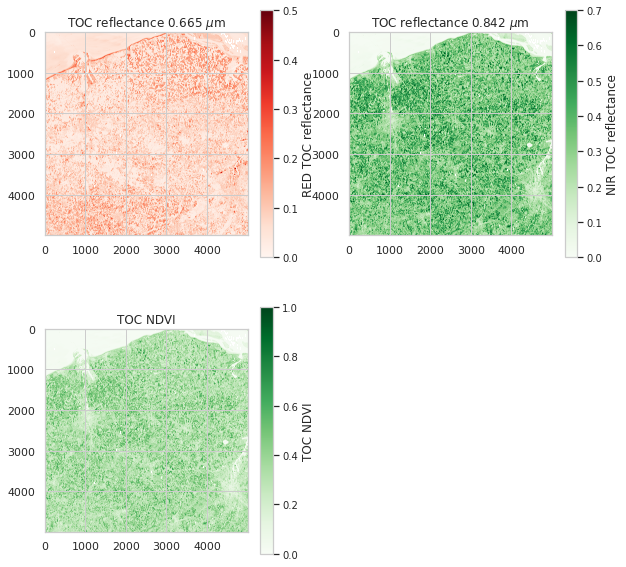

In [85]:
#take a subset, in this case the upper left quadrant
sub = np.array([500, 5500])

#make map plots for the RED and NIR and resulting NDVI, use subplots
mplot.figure(figsize=(10,10))
mplot.subplot(221)

#TOC reflectances
mplot.imshow(d_red[sub[0]:sub[1],sub[0]:sub[1]], cmap='Reds', vmin=0., vmax=0.5)
mplot.title('TOC reflectance 0.665 $\mu$m')

cb = mplot.colorbar(aspect=20)  
cb.ax.set_ylabel('RED TOC reflectance')
cb.ax.tick_params(labelsize=10)

mplot.subplot(222)
mplot.imshow(d_nir[sub[0]:sub[1],sub[0]:sub[1]], cmap='Greens', vmin=0., vmax=0.7)
mplot.title('TOC reflectance 0.842 $\mu$m')
cb = mplot.colorbar(aspect=20)  
cb.ax.set_ylabel('NIR TOC reflectance')
cb.ax.tick_params(labelsize=10)

#TOC NDVI
mplot.subplot(223)
mplot.imshow(d_nir[sub[0]:sub[1],sub[0]:sub[1]], cmap='Greens', vmin=0., vmax=1.0)
mplot.title('TOC NDVI')

#same as for the TOC reflectance colorbar, but now for TOC NDVI
cb = mplot.colorbar(aspect=20)  
cb.ax.set_ylabel('TOC NDVI')
cb.ax.tick_params(labelsize=10)